In [3]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = []
y = []
for i in range(50):
    X.append([rd.random() * 4, rd.random() * 10])
    y.append(-1)
    
for i in range(50):
    X.append([6 + rd.random() * 4, rd.random() * 10])
    y.append(1)
    
X = np.array(X)
y = np.array(y)

In [114]:
def L_Habb(w, x, y):
    return max(0, -np.dot(w, x) * y)

def Ld_Habb(w, x, y):
    if np.dot(w, x) * y < 0:
        return -1
    return 0

def find_x(w, y):
    return (w[2] - w[1] * y) / w[0]

def train(X, y, eta=0.02, lambd = 0.9):
    X = np.append(X, np.array([-1] * len(X)).reshape(len(X), 1), axis=1)
    w = np.array([0.1] * len(X[0]))
    Q = 1 / len(X) * sum([ L_Habb(w, X[i], y[i]) for i in range(len(X)) ])
    
    kf = 1
    
    eta = 1
    
    n_iter = 0
    
    Q_arr = []
    
    while (n_iter < 10000) and kf > 1e-5:
        eta = max(eta - 1 / (n_iter + 1000), 0.03)
        Q_prev = Q
        
        Q_arr.append([Q, Q_prev, kf])
        
        n_iter += 1
        i = rd.randint(0,99)
        x = X[i]
        eps = L_Habb(w, x, y[i])
        w = w - eta * Ld_Habb(w, x, y[i]) * x * y[i]
        Q = (1-lambd) * Q + lambd * eps
        kf = (abs(Q_prev - Q) / abs(max(Q_prev, Q)))
    print('n_iter:', n_iter)
    print(Q_arr[-10:])
    return w

n_iter: 1543
[[2.84051393e-316, 2.84051393e-316, 0.9], [2.840514e-317, 2.840514e-317, 0.900000003478706], [2.84051e-318, 2.84051e-318, 0.9000000695741229], [2.84053e-319, 2.84053e-319, 0.8999993042582871], [2.8404e-320, 2.8404e-320, 0.9000052180265423], [2.84e-321, 2.84e-321, 0.8999826056705514], [2.8e-322, 2.8e-322, 0.9008695652173913], [3e-323, 3e-323, 0.8947368421052632], [5e-324, 5e-324, 0.8333333333333334], [0.0, 0.0, 1.0]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


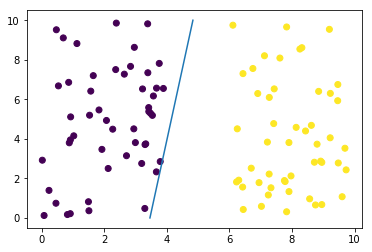

In [115]:
w = train(X, y)

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot([find_x(w, 0), find_x(w, 10)], [0, 10])